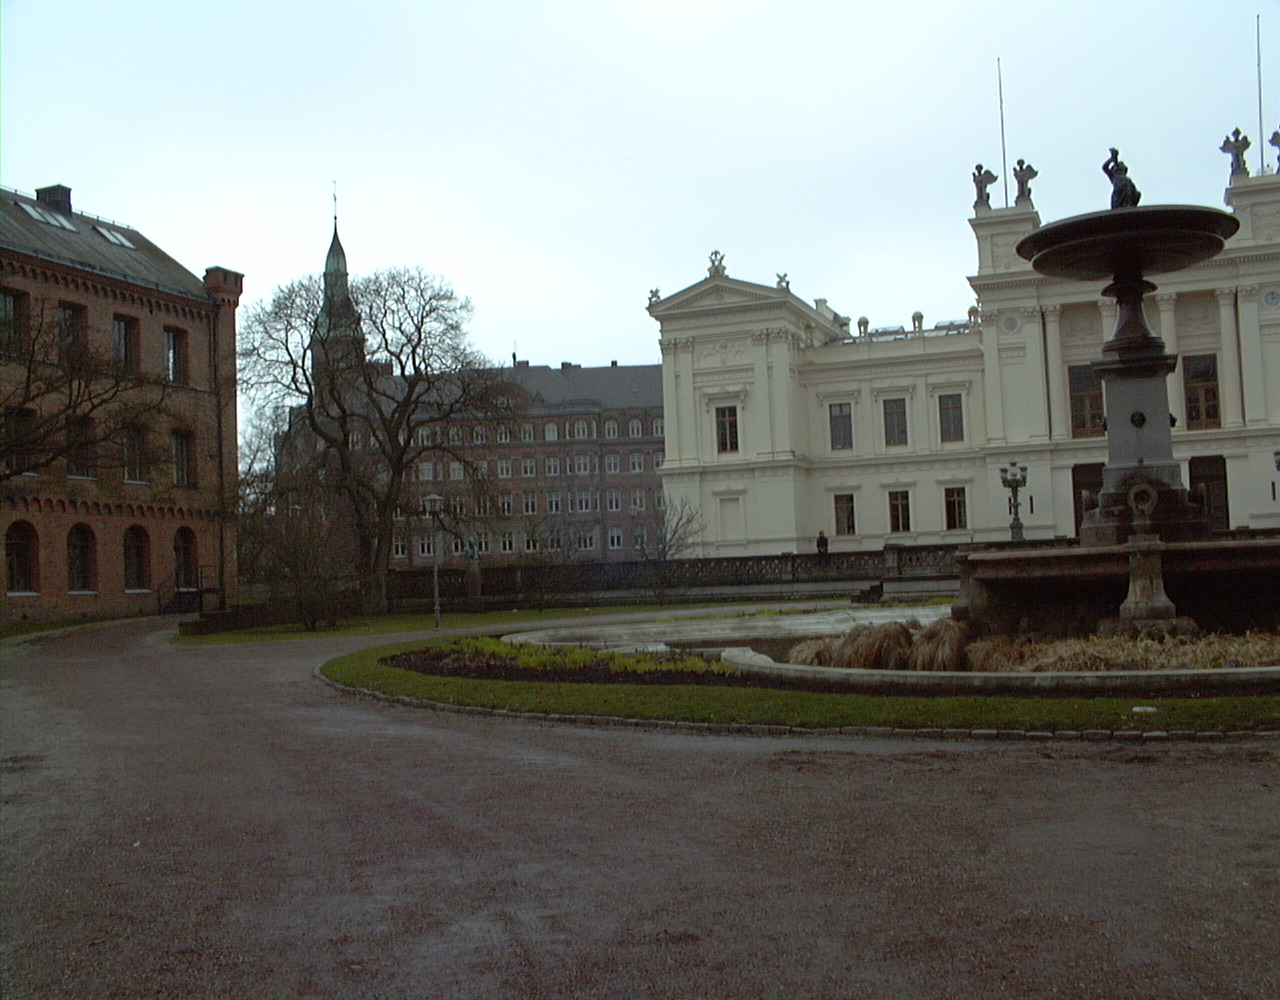

In [13]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from urllib.request import urlopen 
import numpy as np

img_left = cv.imread('Univ4.jpg', -1)
cv2_imshow(img_left)

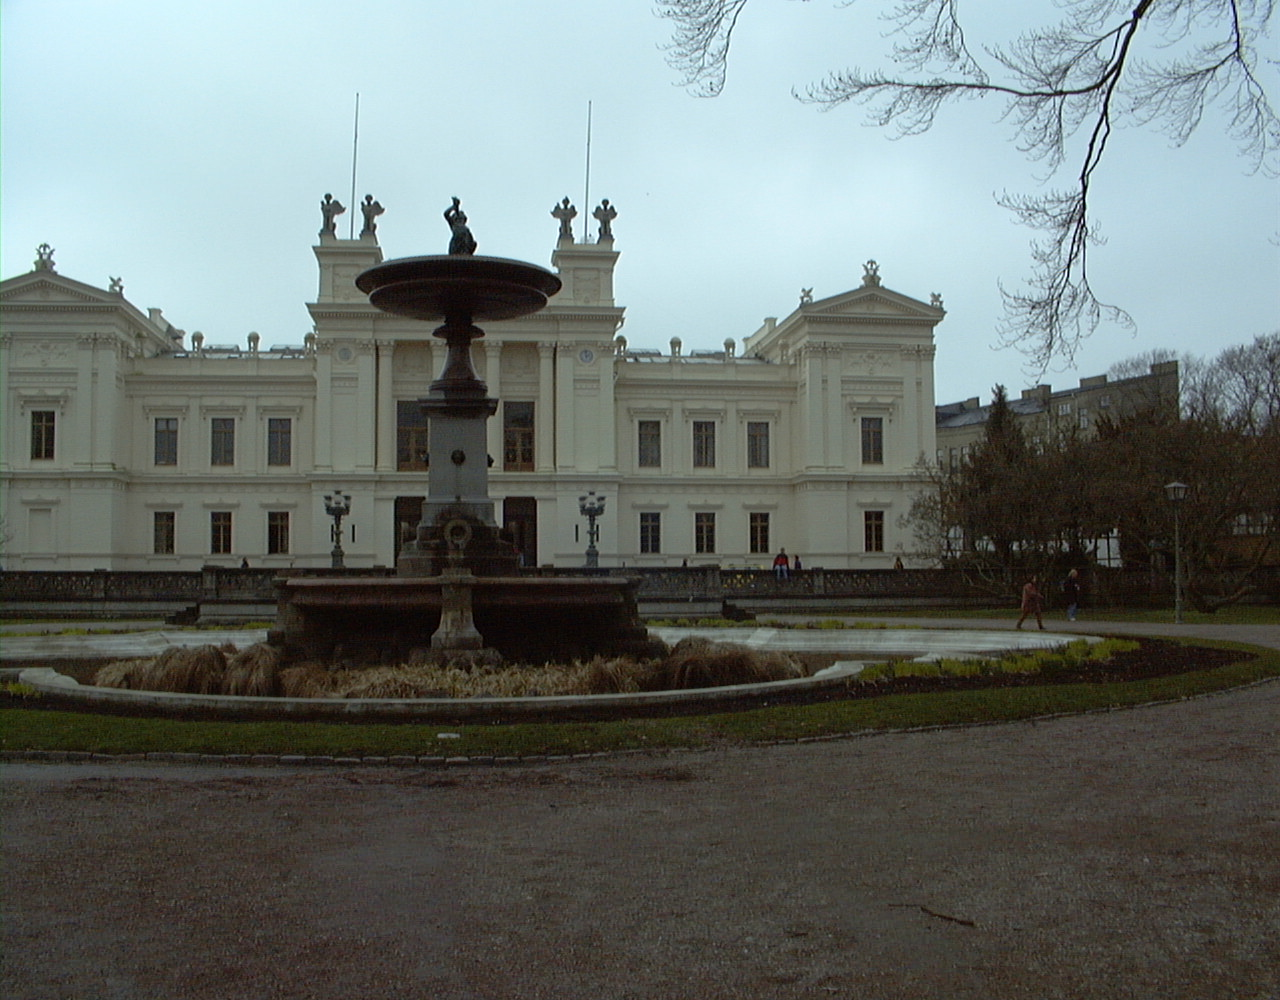

In [14]:
img_right = cv.imread('Univ3.jpg', -1)
cv2_imshow(img_right)

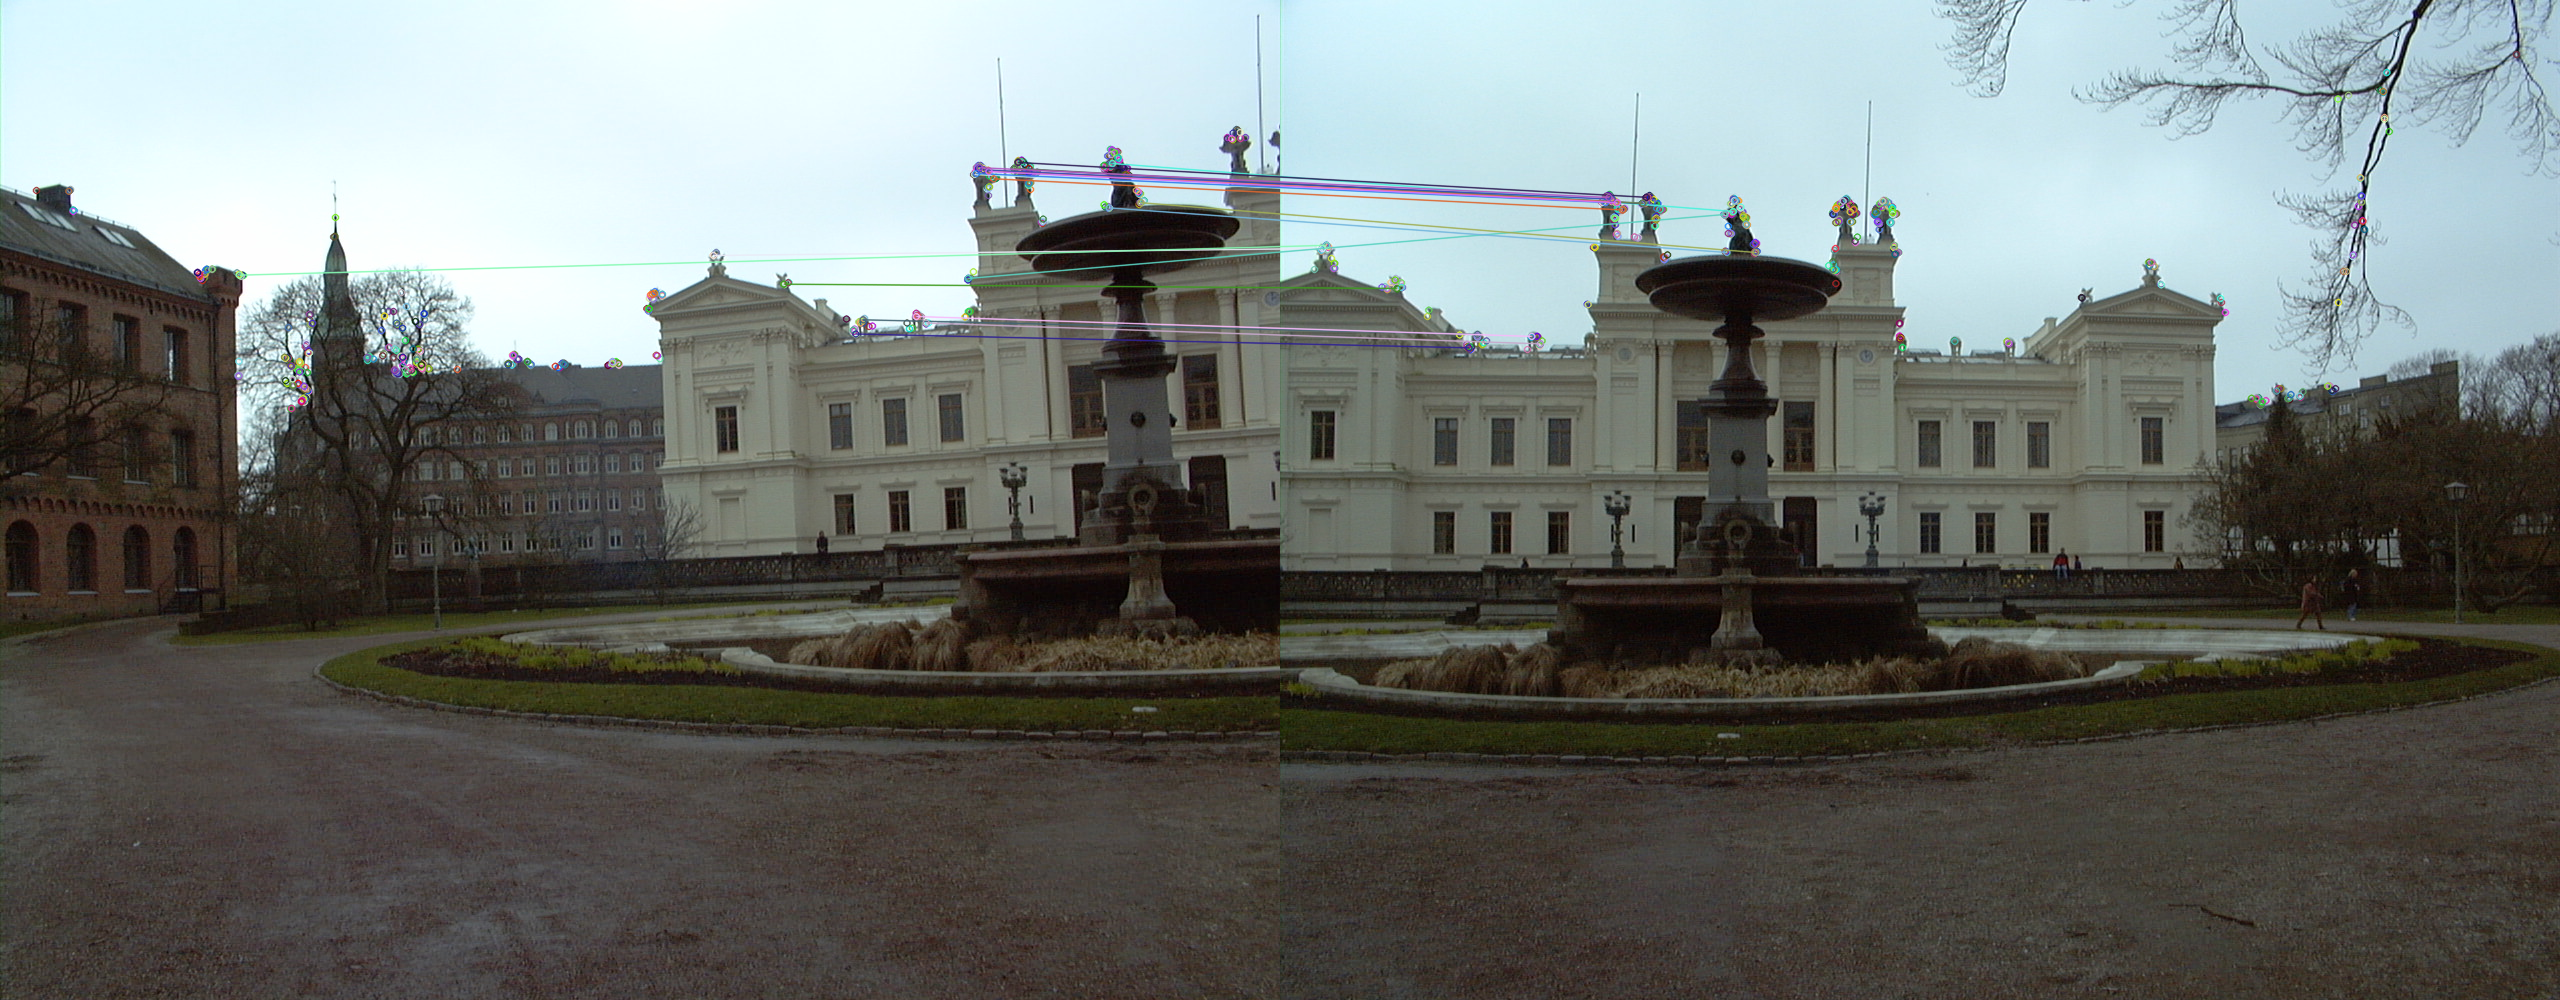

In [17]:
# orb descriptor
orb = cv.ORB_create()
# find key points
kp1, des1 = orb.detectAndCompute(img_left, None)
kp2, des2 = orb.detectAndCompute(img_right, None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
matches_img = cv.drawMatchesKnn(img_left,kp1,img_right,kp2,good,None)
cv2_imshow(matches_img)

In [0]:
# homography computation
MIN_MATCH_COUNT = 5
if len(good) > MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
    h,w,c = img_right.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts, M)
else:
    print("Not enought matches are found - %d/%d", (len(good)/MIN_MATCH_COUNT))

# creating panorama image
panorama_img = cv.warpPerspective(img_right,M,(img_left.shape[1] + img_right.shape[1], img_left.shape[0]))
panorama_img[0:img_left.shape[0],0:img_left.shape[1]] = img_left
cv2_imshow(panorama_img)
